In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [ ]:
df=pd.read_csv("titanic-passengers.csv",sep=';')

Data cleaning

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Dropping the Cabin column because 77% of its values are Nan
df.drop("Cabin",axis=1,inplace=True)
#replacing the Nan values in age with the mean value
df['Age'].fillna(df['Age'].mean(),inplace=True)


In [ ]:
#printing the most common value in Embarked
print(df['Embarked'].value_counts())
#replacing the Nan values by the most common one
df['Embarked'].fillna('S',inplace=True)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


**Data visualization**

*Age Histogram*

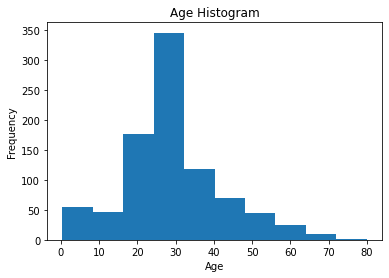

In [ ]:
plt.title("Age Histogram")
plt.xlabel("Age")
df['Age'].plot.hist()

*Fare Histogram*

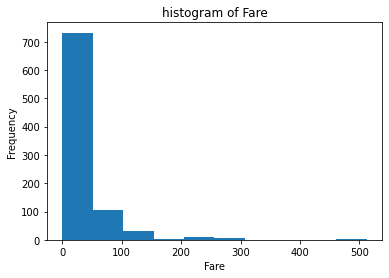

In [ ]:
plt.title("histogram of Fare")
plt.xlabel("Fare")
df['Fare'].plot.hist()

Bar plot of value count by gender

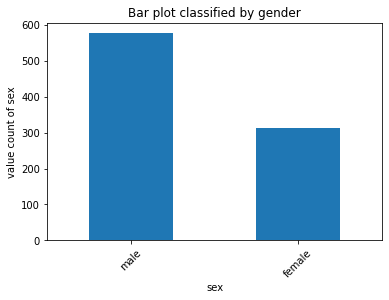

In [ ]:
plt.xlabel("sex")
plt.ylabel("value count of sex")
plt.title("Bar plot classified by gender")
vc=df["Sex"].value_counts()
vc.plot.bar(rot=45)

*Correlation between Sex and Age and their importance in survival rate*

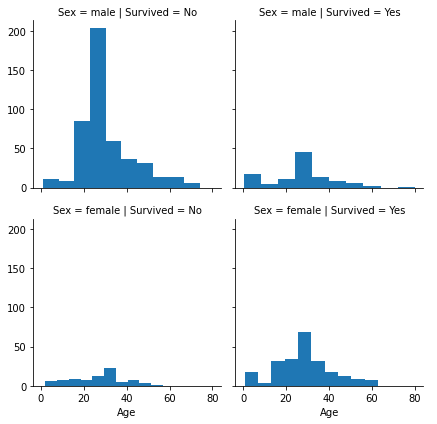

In [ ]:
grid=sns.FacetGrid(df,row="Sex",col="Survived")
grid.map(plt.hist,"Age")
grid.add_legend()

*Correlation between Embarkation and its importance in survival rate*

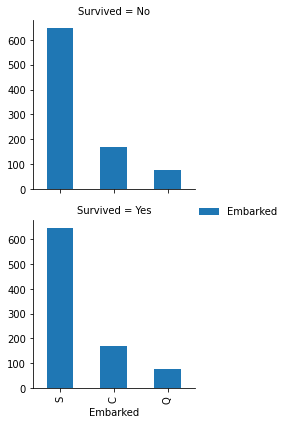

In [ ]:
grid=sns.FacetGrid(df,row="Survived")
vc1=df["Embarked"].value_counts()
grid.map(vc1.plot.bar,"Embarked")
grid.add_legend()

*Plot correlation map def*

In [ ]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

In [ ]:
#Transforming the Survived column into numerical values
encoder=LabelEncoder()
df['Survived']=encoder.fit_transform(df['Survived'])

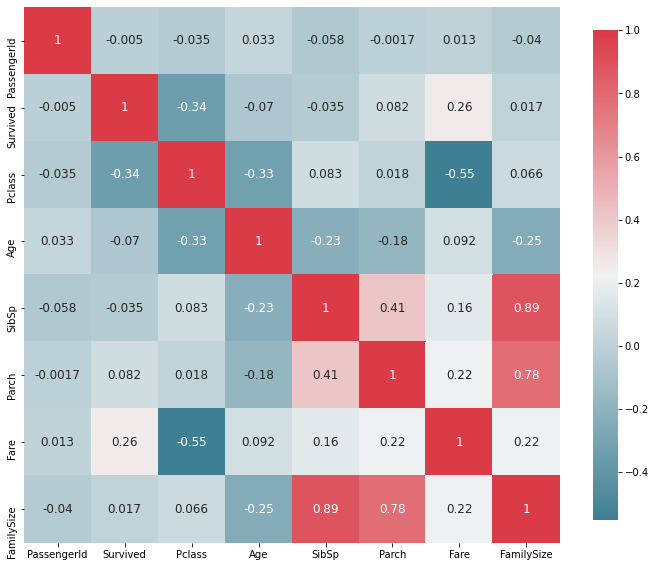

In [ ]:
plot_correlation_map(df)

The heatmap shows the correlation between each two features

*the groupby function combined with the mean() to view the relation between Pclass and survived*

In [ ]:
df.groupby(["Survived","Pclass"]).mean()

PassengerId        Age     SibSp     Parch       Fare
Survived Pclass                                                       
0        1        410.300000  40.896074  0.287500  0.300000  64.684008
         2        452.123711  33.266947  0.319588  0.144330  19.412328
         3        453.580645  27.417500  0.672043  0.384409  13.669364
1        1        491.772059  34.784615  0.492647  0.389706  95.608029
         2        439.080460  26.076166  0.494253  0.643678  22.055700
         3        394.058824  23.232689  0.436975  0.420168  13.694887

In [ ]:
Title_Dictionary = {"Capt":"Officer","Col":"Officer","Major":"Officer","Dr":"Officer","Rev":"Officer","Jonkheer":"Royalty","Don":"Royalty","Sir":"Royalty","Lady":"Royalty","the Countess":"Royalty","Dona":"Royalty","Mme":"Miss","Mlle":"Miss","Miss":"Miss","Ms":"Mrs","Mr":"Mrs","Mrs":"Mrs","Master":"Master"}

In [ ]:
df["Title"]=df.Name.str.extract('([A-Za-z]+)\.',expand=False)

In [ ]:
df["Title"].replace(Title_Dictionary,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,S,Mrs
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,S,Mrs
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,S,Mrs
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,S,Mrs
4,672,0,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,Mrs
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,C,Mrs
888,535,0,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,S,Miss
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,S,Mrs


In [ ]:
#Dropping the Name column since we replaced it with Title
df.drop("Name",axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: row, col. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


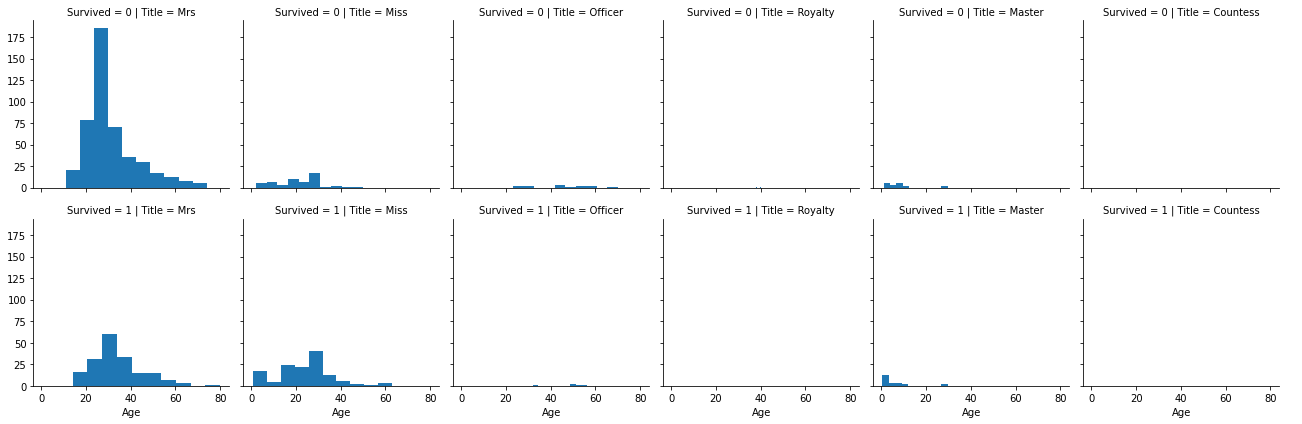

In [ ]:
#correlation between Title and other features
def correlation_between_features(data,row,col,f):
  grid=sns.FacetGrid(data,row,col)
  grid.map(plt.hist,f)
  grid.add_legend()
correlation_between_features(df,"Survived","Title","Age")

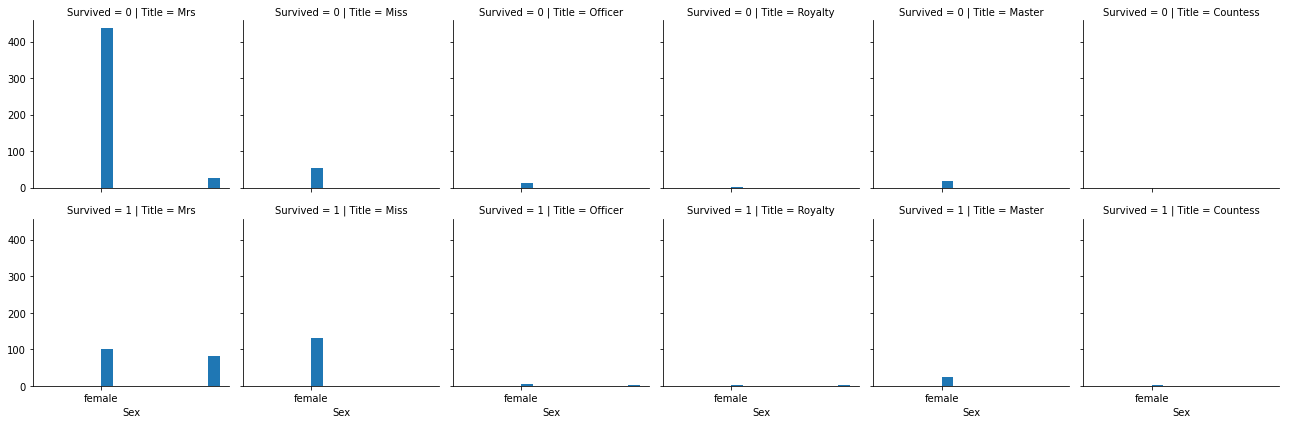

In [ ]:
correlation_between_features(df,"Survived","Title","Sex")


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: row, col. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


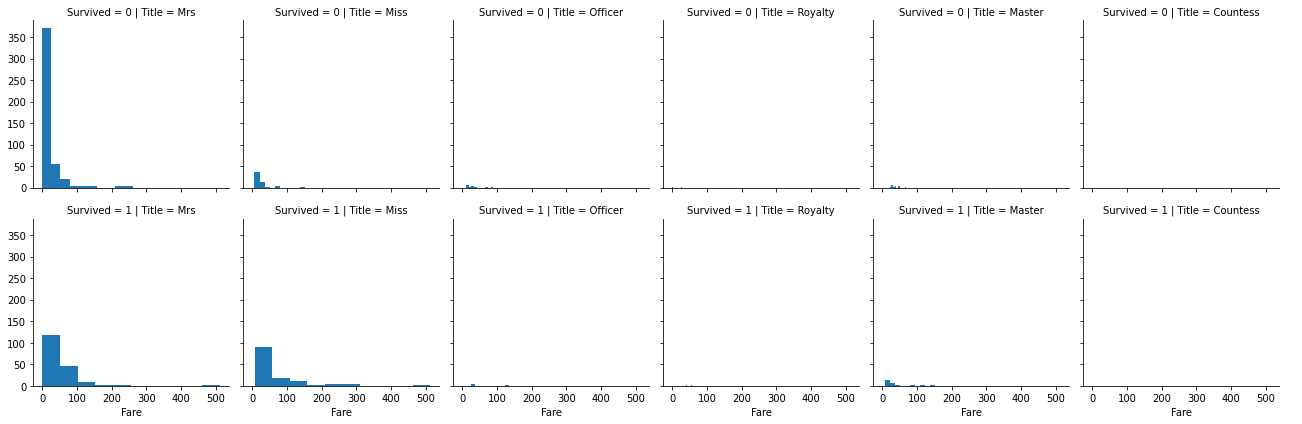

In [ ]:
correlation_between_features(df,"Survived","Title","Fare")

In [ ]:
#Creating a new feature FamilySize using Parch and SibSp
df['FamilySize']=df['Parch']+df['SibSp']

In [ ]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,343,0,2,male,28.000000,0,0,248740,13.0000,S,Mrs,0
1,76,0,3,male,25.000000,0,0,348123,7.6500,S,Mrs,0
2,641,0,3,male,20.000000,0,0,350050,7.8542,S,Mrs,0
3,568,0,3,female,29.000000,0,4,349909,21.0750,S,Mrs,4
4,672,0,1,male,31.000000,1,0,F.C. 12750,52.0000,S,Mrs,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,female,14.000000,1,0,237736,30.0708,C,Mrs,1
887,61,0,3,male,22.000000,0,0,2669,7.2292,C,Mrs,0
888,535,0,3,female,30.000000,0,0,315084,8.6625,S,Miss,0
889,102,0,3,male,29.699118,0,0,349215,7.8958,S,Mrs,0


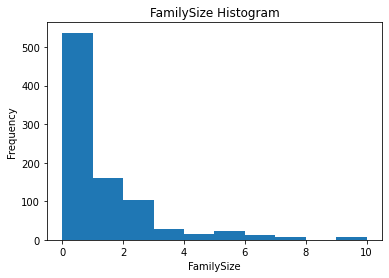

In [ ]:
#Familysize histogram
plt.title("FamilySize Histogram")
plt.xlabel("FamilySize")
df['FamilySize'].plot.hist()

In [ ]:
#correlation between familysize and survival
df[["Survived", "FamilySize"]].groupby(["FamilySize"], as_index=True).mean()


,Survived
FamilySize,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


We can deduce with this feature that the familiySize of (1:3) have a better survival rate than the others (+/-)